Introduction

*   The dataset contains information about the employment outcomes of engineering graduates, such as salary, job titles, and job locations, along with scores in cognitive, technical, and personality skills.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the Data

In [3]:
df = pd.read_csv("/content/data.xlsx - Sheet1.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

Data Cleaning

In [5]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [6]:
# removing 'Unamed: 0' column

df.drop(columns = ['Unnamed: 0'], inplace = True)

df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [9]:
# object -> datatime format
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])

df.dtypes

<ipython-input-9-d097e6bd45f3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])
<ipython-input-9-d097e6bd45f3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


,0
ID,int64
Salary,float64
DOJ,datetime64[ns]
DOL,object
Designation,object
JobCity,object
Gender,object
DOB,datetime64[ns]
10percentage,float64
10board,object


In [10]:
# missing values

df.isnull().sum()

,0
ID,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0


In [11]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [12]:
df['CollegeCityTier']

,CollegeCityTier
0,0
1,0
2,0
3,1
4,0
...,...
3993,0
3994,1
3995,0
3996,1


EDA - Univariate (Non Visualization)

Divide the dataframe into two parts -> numerical and categorical

In [13]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_cat = df.select_dtypes(include = ['object'])

In [14]:
df_num.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.3,2007,95.8,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.4,2007,85.0,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.0,2010,68.2,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.6,2007,83.6,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.0,2008,76.8,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
df_cat.head()

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,present,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,present,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,present,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,present,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,3/1/15 0:00,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


Create functions to take care of all the summary statistics

In [16]:
def univariate_num_analysis(df_num):
    for col in df_num:
        print("Column Name: ", col)
        print(df_num[col].agg(['min', 'max', 'mean', 'median', 'std']), "\n")

def univariate_cat_analysis(df_cat):
    for col in df_cat:
        print("Column Name: ", col)
        print(df_cat[col].agg(['count', 'nunique', 'unique']), "\n")

In [17]:
univariate_num_analysis(df_num)

Column Name:  ID
min       1.124400e+04
max       1.298275e+06
mean      6.637945e+05
median    6.396000e+05
std       3.632182e+05
Name: ID, dtype: float64 

Column Name:  Salary
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64 

Column Name:  10percentage
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64 

Column Name:  12graduation
min       1995.000000
max       2013.000000
mean      2008.087544
median    2008.000000
std          1.653599
Name: 12graduation, dtype: float64 

Column Name:  12percentage
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64 

Column Name:  CollegeID
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        4802.261482
Name: CollegeID, dtype: float64 


In [18]:
univariate_cat_analysis(df_cat)

Column Name:  DOL
count                                                   3998
nunique                                                   67
unique     [present, 3/1/15 0:00, 5/1/15 0:00, 7/1/15 0:0...
Name: DOL, dtype: object 

Column Name:  Designation
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object 

Column Name:  JobCity
count                                                   3998
nunique                                                  339
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name: JobCity, dtype: object 

Column Name:  Gender
count        3998
nunique         2
unique     [f, m]
Name: Gender, dtype: object 

Column Name:  10board
count                                                   3998
nunique                                                  275
unique     [board ofsecondary education,ap,

EDA - Univariate (Visualization)

1.   Numerical columns Histogram plot, KDE plot, Box plot
2.  Categorical columns: Count plot (or) Bar plot




In [19]:
df_num.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [20]:
df_cat.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

1. Numerical columns

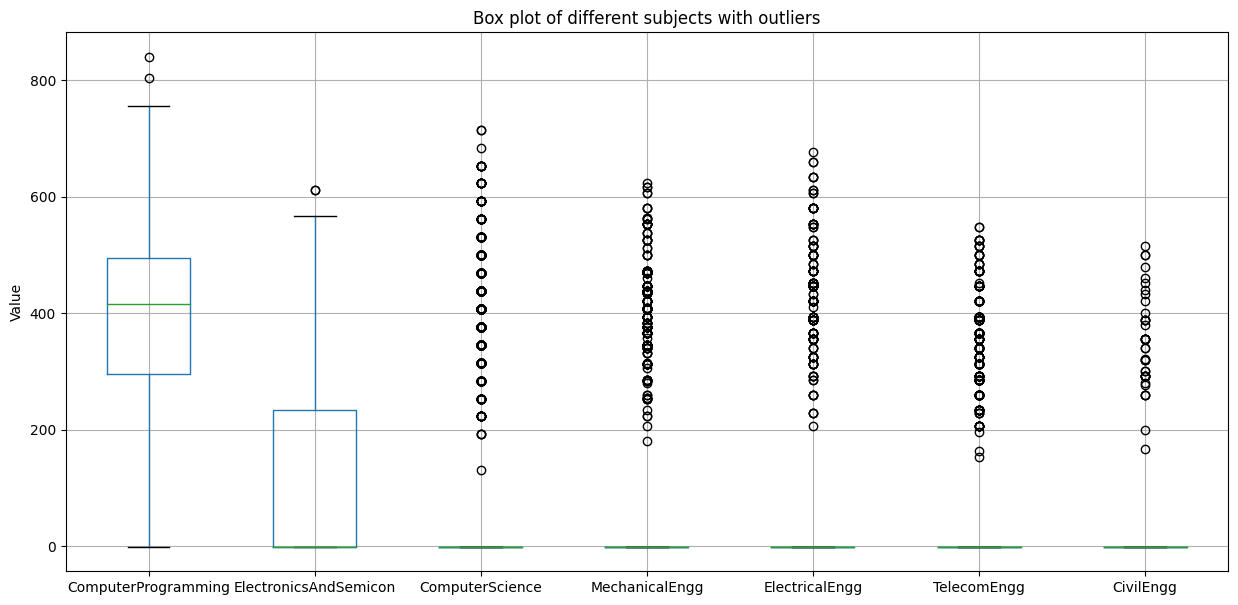

In [21]:
# a box plot of various subjects where the AMCAT tests were offered

cols = ['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

plt.figure(figsize=(15, 7))
df_num[cols].boxplot()
plt.title('Box plot of different subjects with outliers')
plt.ylabel('Value')
plt.show()

Observations

*   Computer programming shows the greatest variability in scores, with a notably high median value. Meanwhile, fields such as computer science, mechanical, electrical, telecom, and civil engineering display more consistent scores, although with some prominent exceptions.



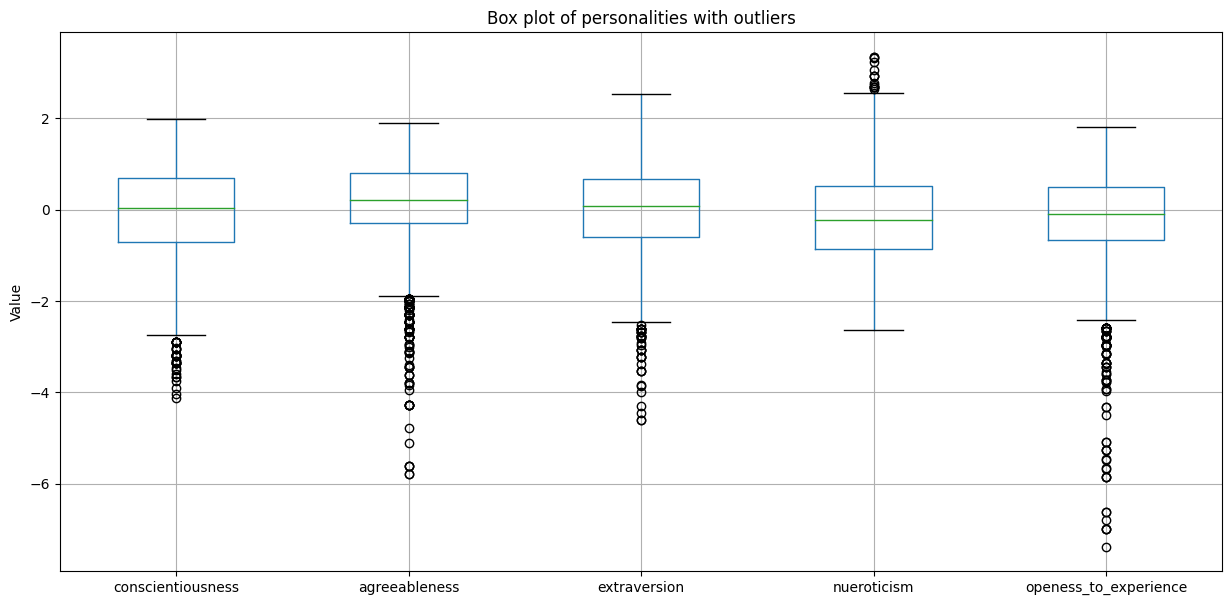

In [22]:
personalities = ['conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience']

plt.figure(figsize=(15, 7))
df_num[personalities].boxplot()
plt.title('Box plot of personalities with outliers')
plt.ylabel('Value')
plt.show()

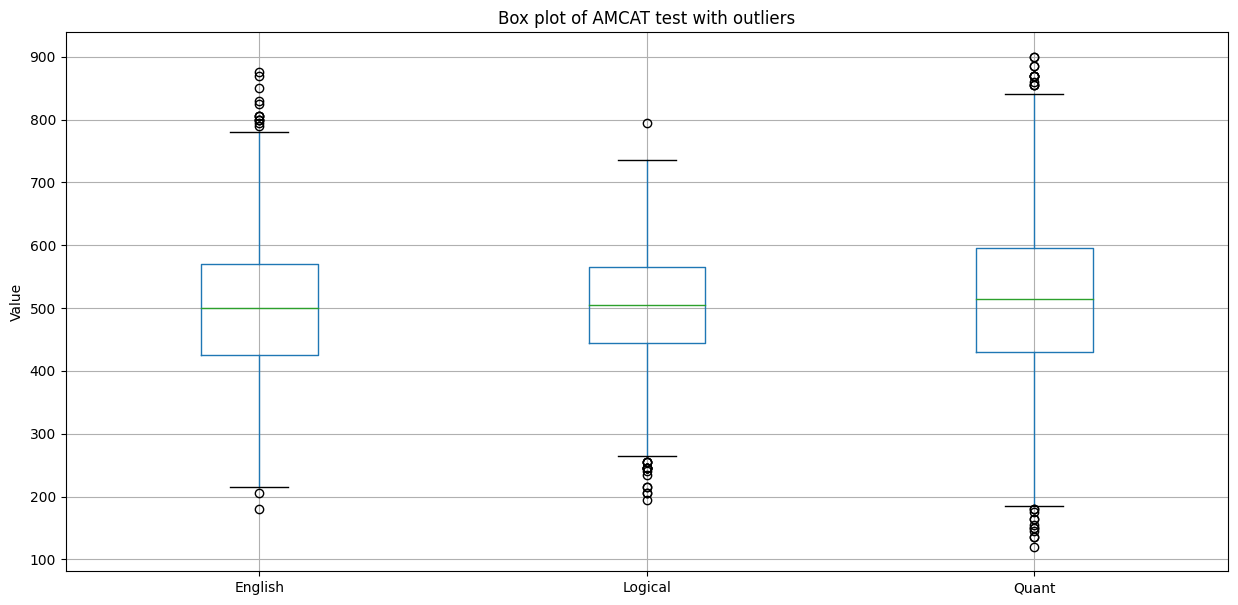

In [23]:
amcat_test = ['English', 'Logical', 'Quant']

plt.figure(figsize=(15, 7))
df_num[amcat_test].boxplot()
plt.title('Box plot of AMCAT test with outliers')
plt.ylabel('Value')
plt.show()

Insights
* The scores range from a maximum of 900 to an average of around 500. Interestingly, the Quant category shows the most significant variability, with scores spanning from 100 to 900, resulting in a higher median value than the other categories.


2. Categorical columns

In [24]:
df_cat.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


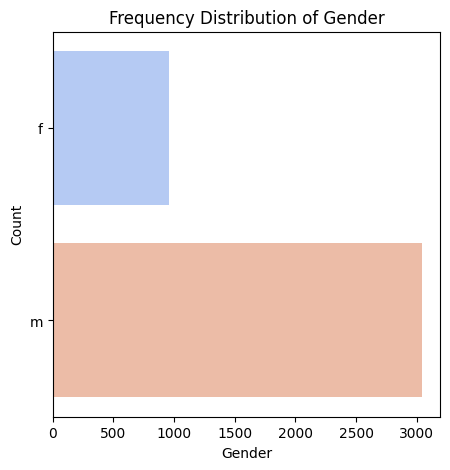

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

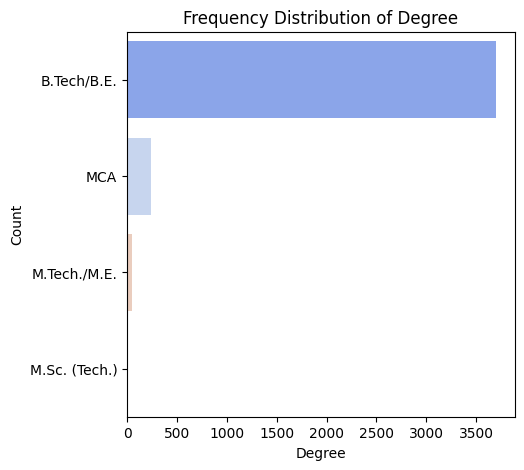

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

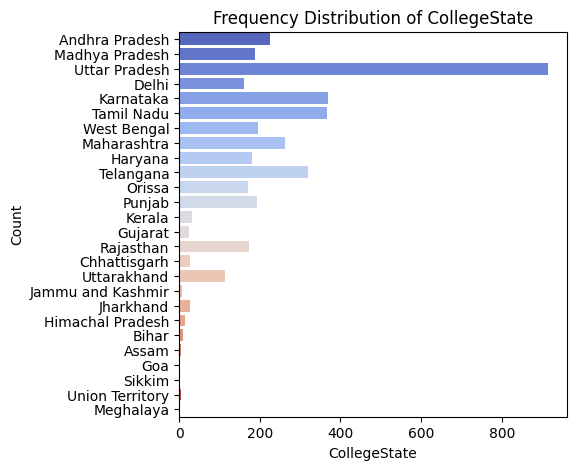

In [25]:
clg_col = ['Gender', 'Degree', 'CollegeState']

for col in clg_col:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df_cat, y=col, hue=col, palette="coolwarm")
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Insights

1.   More men took the test than women
2.   Majority of candidates hold a B.Tech or B.E degree (most common qualification)
3. Tamil Nadu and Karnataka are the next two states with the highest percentage of college-attending candidates (second and third respectively)




In [26]:
def num_viz_analysis(num_data):

    fig, axes = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution Plot")

    axes[0].set_title("Histogram Plot")
    sns.histplot(num_data, ax=axes[0])

    axes[1].set_title("KDE Plot")
    sns.kdeplot(num_data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(num_data, ax=axes[2])

    plt.show()

def cat_viz_analysis(cat_data):

    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    fig.suptitle("Discrete Distribution Plot")

    ax.set_title("Count Plot")
    sns.countplot(x=cat_data, ax=ax)

    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


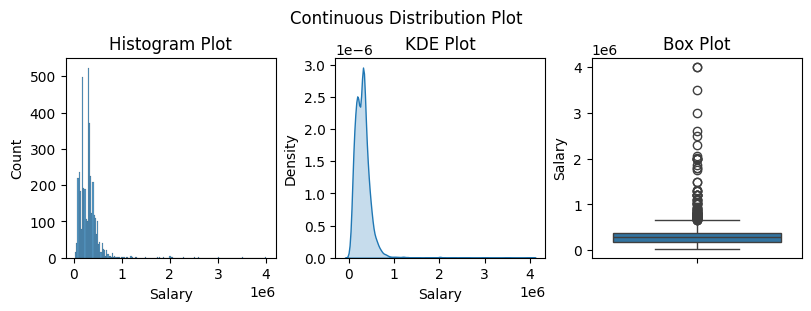

In [27]:
num_viz_analysis(df_num['Salary'])

6. EDA - Bivariate (Visualization)



1. Numerical VS Numerical
2. Categorical VS Categorical
3. Numerical VS Categorical


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


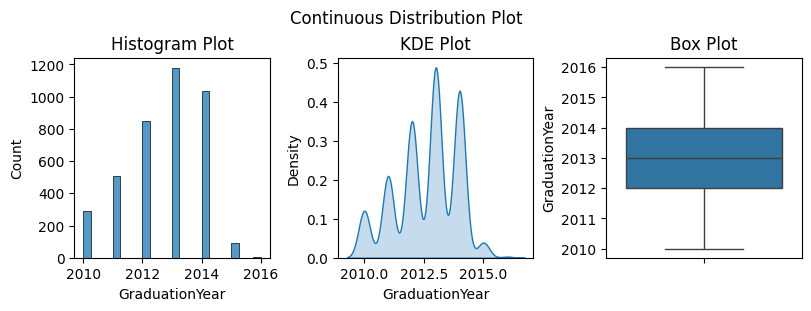

In [28]:
# outliers removal
percentile25 = df['GraduationYear'].quantile(0.25)
percentile75 = df['GraduationYear'].quantile(0.75)

# thresholds
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df = df[df['GraduationYear'] < upper_limit]
df = df[df['GraduationYear'] > lower_limit]

num_viz_analysis(df['GraduationYear'])

Insights:

1. The most common graduation year is 2013, followed by 2014 and 2012.

Salary vs Gender

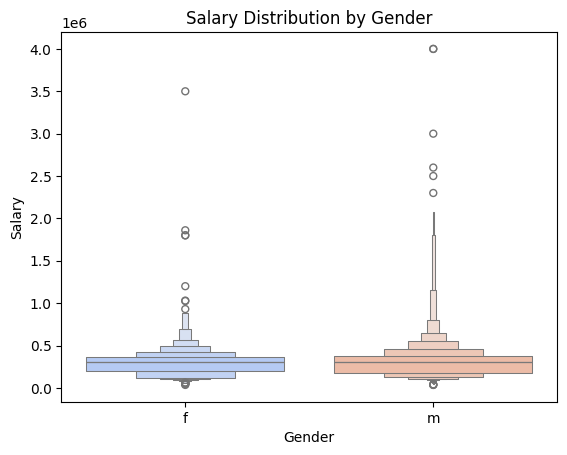

In [29]:
sns.boxenplot(data=df, x="Gender", y="Salary", hue="Gender", palette="coolwarm")
plt.title("Salary Distribution by Gender")
plt.show()

Insights:

* From the plot, men receive a larger salary distribution, meaning they make more money. However, as we observed in previous analyses, there are not as many men as women in our study. This suggests that the 2015 study had a higher proportion of men than women.

Salary vs Experience


In [30]:
from datetime import datetime

<ipython-input-31-b53999646190>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')


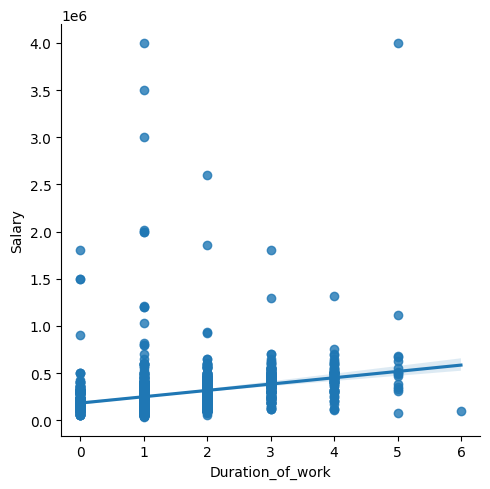

In [31]:
# converting DOL to date time format
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')

today_date = datetime.today().strftime('%Y-%m-%d')
df['DOL'] = df['DOL'].replace('present', today_date)

# subtracting year of joining from the year of leaving in the company
df['Duration_of_work'] = df['DOL'].dt.year - df['DOJ'].dt.year

sns.lmplot(x="Duration_of_work", y="Salary", data=df)

Age vs Experience


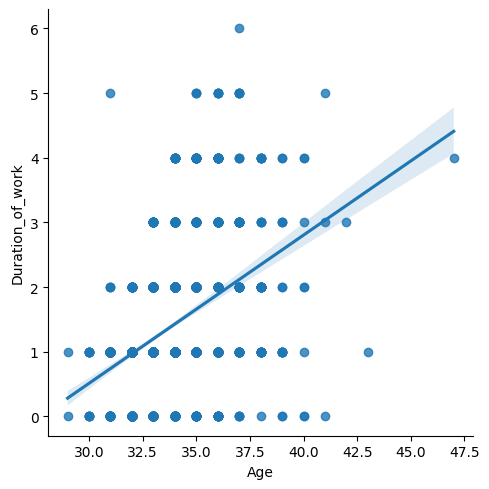

In [32]:
df['Age'] = 2024 - df['DOB'].dt.year

sns.lmplot(x="Age", y="Duration_of_work", data=df)

7. Research Questions
* Is there a relationship between gender and specialization?

In [33]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [34]:
# first, we will clean up the Specialization column

# dictionary to map keywords to specializations
specialization_mapping = {
    'computer': 'CSE',
    'communication': 'ECE',
    'information': 'IT',
    'electrical': 'EEE',
    'electro': 'EEE',
    'telecomm': 'EEE',
    'power': 'EEE',
    'embedded': 'EEE',
    'combus': 'Mechanical Engg',
    'polymer': 'Chemical Engg',
    'chem': 'Chemical Engg',
    'civil': 'Civil Engg',
    'metallurgical': 'Metallurgical Engg',
    'instrument': 'Instrumentation Engg',
    'mech': 'Mechanical Engg',
    'industrial': 'Production Engg',
    'bio': 'Biomedical Engineering',
    'auto': 'Automobiles',
    'aero': 'Aeronautical Engg',
    'ceramic': 'Civil Engg'
}

# function to replace based on keywords in the dictionary
def clean_specialization_optimized(row):
    for key, value in specialization_mapping.items():
        if key in row.lower():  # Convert to lower to ensure case-insensitivity
            return value
    return row

# now, lets apply the function using map
df['Specialization'] = df['Specialization'].map(clean_specialization_optimized)

<Figure size 800x600 with 0 Axes>

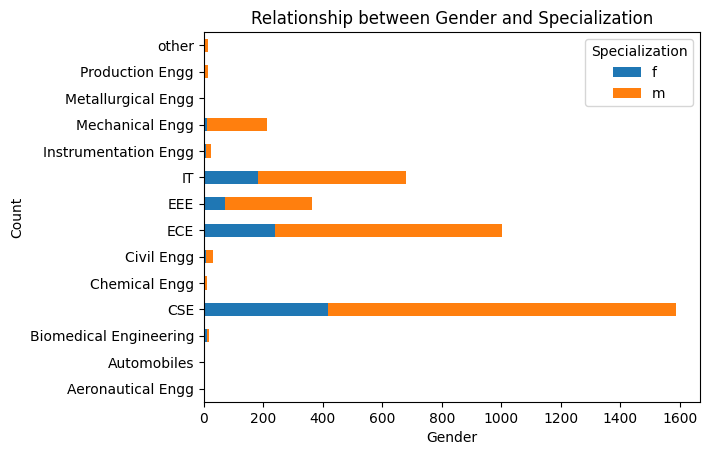

In [35]:
table = pd.crosstab(df['Specialization'], df['Gender'])

plt.figure(figsize=(8, 6))
table.plot(kind='barh', stacked=True)
plt.title('Relationship between Gender and Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Specialization')
plt.show()

Which specialization earns more?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0.5, 1.0, 'Distribution of salary by Specialization')

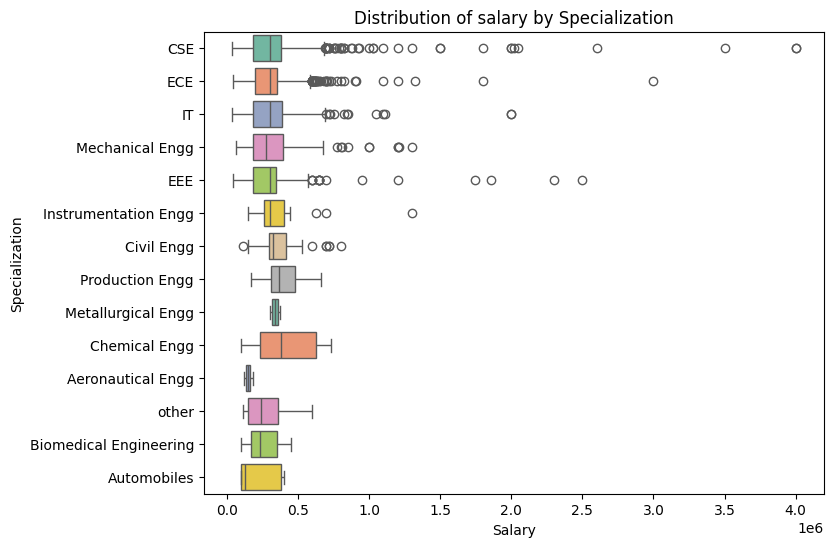

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Specialization', x='Salary', data=df, hue="Specialization", palette="Set2")
plt.title("Distribution of salary by Specialization")

salaries vary significantly across specializations, with some fields having more extreme outliers. Individual factors and market conditions play a crucial role in determining earning potential.
* Certain specializations have high earners, with CSE, ECE, and EEE having the most outliers.
* Chemical Engineering has a wider salary range.


Conclusion
* The analysis reveals key findings on salary trends, specialization, and skill sets of newly graduated professionals in different roles. It highlights the importance of individual strengths, experience, and market conditions in influencing salary, demonstrating that these elements are essential in determining compensation."